In [1]:
import numpy as np
import pandas as pd

DATA_DIR = '../data/'
DATA_FILE = 'all_data.csv'

In [2]:
dataset = pd.read_csv(DATA_DIR + DATA_FILE, index_col=0)

In [3]:
dataset.head()

,Season,Home Team,Home Score,-,Away Score,Away Team
0,2014/15,Trojans 1,22.0,-,16.0,Kingfisher 1
1,2014/15,Bec 1,26.0,-,16.0,Norwich Knights 1
2,2014/15,Birmingham City 1,5.0,-,21.0,Nomads 1
3,2014/15,Nomads 1,14.0,-,21.0,KV 1
4,2014/15,Trojans 1,27.0,-,10.0,Tornadoes 1


In [4]:
df = dataset.drop('-',1).copy()

In [5]:
renamed_cols = ['season', 'home_team', 'home_goals', 'away_goals', 'away_team']
df.columns = renamed_cols

In [6]:
df

,season,home_team,home_goals,away_goals,away_team
0,2014/15,Trojans 1,22.0,16.0,Kingfisher 1
1,2014/15,Bec 1,26.0,16.0,Norwich Knights 1
2,2014/15,Birmingham City 1,5.0,21.0,Nomads 1
3,2014/15,Nomads 1,14.0,21.0,KV 1
4,2014/15,Trojans 1,27.0,10.0,Tornadoes 1
...,...,...,...,...,...
433,2019/20,Cambridge Tigers 1,NaN,NaN,Tornadoes 1
434,2019/20,Highbury 1,NaN,NaN,Kingfisher 1
435,2019/20,Bec 1,NaN,NaN,Tornadoes 1
436,2019/20,Norwich Knights 1,NaN,NaN,Highbury 1


In [7]:
# add additional columns
df.loc[:, 'away_draws'] = 0
df.loc[:, 'away_losses'] = 0
df.loc[:, 'away_minutes_played'] = 0
df.loc[:, 'away_rank'] = 0
df.loc[:, 'away_win_percentage'] = 0.0
df.loc[:, 'away_wins'] = 0
df.loc[:, 'home_draws'] = 0
df.loc[:, 'home_losses' ] = 0
df.loc[:, 'home_minutes_played'] = 0
df.loc[:, 'home_rank'] = 0
df.loc[:, 'home_win_percentage'] = 0.0
df.loc[:, 'home_wins'] = 0
df.loc[:, 'losing_abbr'] = ''
df.loc[:, 'losing_name'] = ''
df.loc[:, 'winner'] = ''
df.loc[:, 'winning_abbr'] = ''
df.loc[:, 'winning_name'] = ''
df

,season,home_team,home_goals,away_goals,away_team,away_draws,away_losses,away_minutes_played,away_rank,away_win_percentage,...,home_losses,home_minutes_played,home_rank,home_win_percentage,home_wins,losing_abbr,losing_name,winner,winning_abbr,winning_name
0,2014/15,Trojans 1,22.0,16.0,Kingfisher 1,0,0,0,0,0.0,...,0,0,0,0.0,0,,,,,
1,2014/15,Bec 1,26.0,16.0,Norwich Knights 1,0,0,0,0,0.0,...,0,0,0,0.0,0,,,,,
2,2014/15,Birmingham City 1,5.0,21.0,Nomads 1,0,0,0,0,0.0,...,0,0,0,0.0,0,,,,,
3,2014/15,Nomads 1,14.0,21.0,KV 1,0,0,0,0,0.0,...,0,0,0,0.0,0,,,,,
4,2014/15,Trojans 1,27.0,10.0,Tornadoes 1,0,0,0,0,0.0,...,0,0,0,0.0,0,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,2019/20,Cambridge Tigers 1,NaN,NaN,Tornadoes 1,0,0,0,0,0.0,...,0,0,0,0.0,0,,,,,
434,2019/20,Highbury 1,NaN,NaN,Kingfisher 1,0,0,0,0,0.0,...,0,0,0,0.0,0,,,,,
435,2019/20,Bec 1,NaN,NaN,Tornadoes 1,0,0,0,0,0.0,...,0,0,0,0.0,0,,,,,
436,2019/20,Norwich Knights 1,NaN,NaN,Highbury 1,0,0,0,0,0.0,...,0,0,0,0.0,0,,,,,


In [8]:
class LeagueTable:
    def __init__(self, teams):
        self.teams = list(teams)
        self.table = pd.DataFrame(np.array([teams, [0] * len(self.teams), [0] * len(self.teams), [0] * len(self.teams), [0] * len(self.teams), [0] * len(self.teams), [0] * len(self.teams), [0] * len(self.teams), [0] * len(self.teams)]).T, columns=['Team', 'P', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts'])
        self.positions = np.array(range(1, len(self.teams) + 1))
        self.sort_table()
    
    def sort_table(self):
        self.table.sort_values(by=['Team'], ascending=True, inplace=True)
        self.table.sort_values(by=['Pts', 'GD', 'F'], ascending=False, inplace=True)
        self.table.set_index(self.positions, inplace=True)
        
    def show_table(self):
        return self.table.head(len(self.teams))
    
    def add_result(self, team_a, scored_a, team_b, scored_b):
        # Team A
        self.table.loc[self.table['Team'] == team_a, 'P'] += 1
        self.table.loc[self.table['Team'] == team_a, 'W'] += 1 if int(scored_a) > int(scored_b) else 0
        self.table.loc[self.table['Team'] == team_a, 'D'] += 1 if int(scored_a) == int(scored_b) else 0
        self.table.loc[self.table['Team'] == team_a, 'L'] += 1 if int(scored_a) < int(scored_b) else 0
        self.table.loc[self.table['Team'] == team_a, 'F'] += int(scored_a)
        self.table.loc[self.table['Team'] == team_a, 'A'] += int(scored_b)
        self.table.loc[self.table['Team'] == team_a, 'GD'] += int(scored_a) - int(scored_b)
        self.table.loc[self.table['Team'] == team_a, 'Pts'] += 2 if int(scored_a) > int(scored_b) else 1 if int(scored_a) == int(scored_b) else 0
        # Team B
        self.table.loc[self.table['Team'] == team_b, 'P'] += 1
        self.table.loc[self.table['Team'] == team_b, 'W'] += 1 if int(scored_b) > int(scored_a) else 0
        self.table.loc[self.table['Team'] == team_b, 'D'] += 1 if int(scored_b) == int(scored_a) else 0
        self.table.loc[self.table['Team'] == team_b, 'L'] += 1 if int(scored_b) < int(scored_a) else 0
        self.table.loc[self.table['Team'] == team_b, 'F'] += int(scored_b)
        self.table.loc[self.table['Team'] == team_b, 'A'] += int(scored_a)
        self.table.loc[self.table['Team'] == team_b, 'GD'] += int(scored_b) - int(scored_a)
        self.table.loc[self.table['Team'] == team_b, 'Pts'] += 2 if int(scored_b) > int(scored_a) else 1 if int(scored_b) == int(scored_a) else 0
        # Reorder table
        self.sort_table()
    
    def deduct_points(self, team, pts):
        self.table.loc[self.table['Team'] == team, 'Pts'] -= pts
        self.sort_table()

In [9]:
league_tables = {}
seasons_df = {}
for season in df.season.unique():
    season_df = df.loc[df.season == season].copy()
    season_df.reset_index(drop=True, inplace=True)
    
    seasons_df[season] = season_df
    league_tables[season] = LeagueTable(season_df['home_team'].unique())
    

In [10]:
league_tables['2014/15'].show_table()

,Team,P,W,D,L,F,A,GD,Pts
1,Bec 1,0,0,0,0,0,0,0,0
2,Birmingham City 1,0,0,0,0,0,0,0,0
3,KV 1,0,0,0,0,0,0,0,0
4,Kingfisher 1,0,0,0,0,0,0,0,0
5,Nomads 1,0,0,0,0,0,0,0,0
6,Norwich Knights 1,0,0,0,0,0,0,0,0
7,Tornadoes 1,0,0,0,0,0,0,0,0
8,Trojans 1,0,0,0,0,0,0,0,0


In [11]:
seasons_df['2014/15'].head()

,season,home_team,home_goals,away_goals,away_team,away_draws,away_losses,away_minutes_played,away_rank,away_win_percentage,...,home_losses,home_minutes_played,home_rank,home_win_percentage,home_wins,losing_abbr,losing_name,winner,winning_abbr,winning_name
0,2014/15,Trojans 1,22.0,16.0,Kingfisher 1,0,0,0,0,0.0,...,0,0,0,0.0,0,,,,,
1,2014/15,Bec 1,26.0,16.0,Norwich Knights 1,0,0,0,0,0.0,...,0,0,0,0.0,0,,,,,
2,2014/15,Birmingham City 1,5.0,21.0,Nomads 1,0,0,0,0,0.0,...,0,0,0,0.0,0,,,,,
3,2014/15,Nomads 1,14.0,21.0,KV 1,0,0,0,0,0.0,...,0,0,0,0.0,0,,,,,
4,2014/15,Trojans 1,27.0,10.0,Tornadoes 1,0,0,0,0,0.0,...,0,0,0,0.0,0,,,,,


In [12]:
game_data_cols = ['teamId', 'goals_scored', 'goals_conceded', 'win', 'draw', 'loss']
game_data = pd.DataFrame()

In [13]:
for index, row in seasons_df['2014/15'].iterrows():
    
    home_win = int(row['home_goals'] > row['away_goals'])
    draw = int(row['home_goals'] == row['away_goals'])
    home_loss = int(row['home_goals'] < row['away_goals'])
    
    new_rows = pd.DataFrame(columns=game_data_cols,
                            data=[[row['home_team'], row['home_goals'], row['away_goals'], home_win, draw, home_loss],
                                  [row['away_team'], row['away_goals'], row['home_goals'], home_loss, draw, home_win]])
    game_data = game_data.append(new_rows, ignore_index=True)

In [14]:
game_data

,teamId,goals_scored,goals_conceded,win,draw,loss
0,Trojans 1,22.0,16.0,1,0,0
1,Kingfisher 1,16.0,22.0,0,0,1
2,Bec 1,26.0,16.0,1,0,0
3,Norwich Knights 1,16.0,26.0,0,0,1
4,Birmingham City 1,5.0,21.0,0,0,1
...,...,...,...,...,...,...
107,Norwich Knights 1,17.0,17.0,0,1,0
108,Kingfisher 1,24.0,11.0,1,0,0
109,Birmingham City 1,11.0,24.0,0,0,1
110,KV 1,12.0,18.0,0,0,1


In [15]:
table = league_tables['2014/15']
results = seasons_df['2014/15']

In [16]:
pd.options.display.max_columns =50

In [17]:
results.head().shape[0]

5

In [18]:
for index, row in results.iterrows():
    # Update features
    previous_games = game_data[:index*2]
    #team_rank
    results.loc[index, 'home_rank'] = table.show_table()[table.show_table()['Team'] == row['home_team']].index[0].astype('uint16')
    results.loc[index, 'away_rank'] = table.show_table()[table.show_table()['Team'] == row['away_team']].index[0].astype('uint16')
    #team
    results.loc[index, 'home_wins'] = previous_games[previous_games['teamId'] == row['home_team']]['win'].astype('uint16').sum()
    results.loc[index, 'away_wins'] = previous_games[previous_games['teamId'] == row['home_team']]['win'].astype('uint16').sum()
    results.loc[index, 'home_draws'] = previous_games[previous_games['teamId'] == row['home_team']]['draw'].astype('uint16').sum()
    results.loc[index, 'away_draws'] = previous_games[previous_games['teamId'] == row['home_team']]['draw'].astype('uint16').sum()
    results.loc[index, 'home_losses'] = previous_games[previous_games['teamId'] == row['home_team']]['loss'].astype('uint16').sum()
    results.loc[index, 'away_losses'] = previous_games[previous_games['teamId'] == row['home_team']]['loss'].astype('uint16').sum()
    results.loc[index, 'home_minutes_played'] = previous_games[previous_games['teamId'] == row['home_team']].shape[0] * 60
    results.loc[index, 'away_minutes_played'] = previous_games[previous_games['teamId'] == row['away_team']].shape[0] * 60
    results.loc[index, 'home_win_percentage'] = previous_games[previous_games['teamId'] == row['home_team']]['win'].mean()
    results.loc[index, 'away_win_percentage'] = previous_games[previous_games['teamId'] == row['away_team']]['win'].mean()

    
    # results.iloc[index, 7] = previous_games[previous_games['teamId'] == row['away_team']][-5:]['goals_scored'].astype('uint16').sum()
    # results.iloc[index, 8] = previous_games[previous_games['teamId'] == row['home_team']][-5:]['goals_conceded'].astype('uint16').sum()
    # results.iloc[index, 9] = previous_games[previous_games['teamId'] == row['away_team']][-5:]['goals_conceded'].astype('uint16').sum()
    # results.iloc[index, 10] = 2*previous_games[previous_games['teamId'] == row['home_team']][-5:]['win'].astype('uint16').sum() + previous_games[previous_games['teamId'] == row['home_team']][-5:]['draw'].astype('uint16').sum()
    # results.iloc[index, 11] = 2*previous_games[previous_games['teamId'] == row['away_team']][-5:]['win'].astype('uint16').sum() + previous_games[previous_games['teamId'] == row['away_team']][-5:]['draw'].astype('uint16').sum()
    # Add result to table
    table.add_result(row['home_team'], row['home_goals'], row['away_team'], row['away_goals'])

In [19]:
results.fillna(0, inplace=True)

In [20]:
results.head()

,season,home_team,home_goals,away_goals,away_team,away_draws,away_losses,away_minutes_played,away_rank,away_win_percentage,away_wins,home_draws,home_losses,home_minutes_played,home_rank,home_win_percentage,home_wins,losing_abbr,losing_name,winner,winning_abbr,winning_name
0,2014/15,Trojans 1,22.0,16.0,Kingfisher 1,0,0,0,4,0.0,0,0,0,0,8,0.0,0,,,,,
1,2014/15,Bec 1,26.0,16.0,Norwich Knights 1,0,0,0,6,0.0,0,0,0,0,2,0.0,0,,,,,
2,2014/15,Birmingham City 1,5.0,21.0,Nomads 1,0,0,0,5,0.0,0,0,0,0,3,0.0,0,,,,,
3,2014/15,Nomads 1,14.0,21.0,KV 1,0,0,0,4,0.0,1,0,0,60,1,1.0,1,,,,,
4,2014/15,Trojans 1,27.0,10.0,Tornadoes 1,0,0,0,5,0.0,1,0,0,60,4,1.0,1,,,,,


In [21]:
table.show_table()

,Team,P,W,D,L,F,A,GD,Pts
1,Bec 1,14,13,0,1,351,212,139,26
2,Trojans 1,14,12,0,2,335,215,120,24
3,KV 1,14,9,1,4,281,218,63,19
4,Kingfisher 1,14,5,3,6,263,291,-28,13
5,Norwich Knights 1,14,5,2,7,236,253,-17,12
6,Nomads 1,14,4,1,9,237,246,-9,9
7,Tornadoes 1,14,4,1,9,250,318,-68,9
8,Birmingham City 1,14,0,0,14,153,353,-200,0


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

TARGET = ['home_goals', 'away_goals']
FIELDS_TO_DROP = ['season', 'home_team', 'away_team', 'losing_abbr', 'losing_name', 'winner', 'winning_abbr', 'winning_name']

clean_dataset = seasons_df['2014/15'].drop(FIELDS_TO_DROP, 1).dropna().drop_duplicates()
X = clean_dataset.drop(TARGET, 1)
y = clean_dataset[TARGET].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
parameters = {'bootstrap': False,
              'min_samples_leaf': 3, 
              'oob_score': False,
              'n_estimators': 50, 
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6}

model = RandomForestRegressor(**parameters)
model.fit(X_train, y_train)
print(model.predict(X_test).astype(int), y_test)

[[24 13]
 [23 12]
 [16 19]
 [22 12]
 [16 19]
 [17 21]
 [19 18]
 [24 15]
 [23 17]
 [17 20]
 [16 22]
 [19 19]
 [20 18]
 [19 20]] [[14. 10.]
 [24. 19.]
 [18. 28.]
 [18.  8.]
 [16. 16.]
 [19. 30.]
 [16. 18.]
 [17. 11.]
 [12. 18.]
 [16. 27.]
 [11. 31.]
 [22. 27.]
 [23. 23.]
 [17. 17.]]


In [41]:
print(f"""R^2 Training Score: {model.score(X_train, y_train):.2f}
R^2 Test Score: {model.score(X_test, y_test):.2f}
""")

R^2 Training Score: 0.60
R^2 Test Score: 0.09



/Users/andrewbovey/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/andrewbovey/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the buil

In [24]:
X_train

,away_draws,away_losses,away_minutes_played,away_rank,away_win_percentage,away_wins,home_draws,home_losses,home_minutes_played,home_rank,home_win_percentage,home_wins
1,0,0,0,6,0.000000,0,0,0,0,2,0.000000,0
41,0,7,600,4,0.500000,3,0,7,600,7,0.300000,3
11,0,3,120,6,0.000000,0,0,3,180,8,0.000000,0
50,0,12,720,3,0.666667,0,0,12,720,8,0.000000,0
47,0,7,660,2,0.818182,4,0,7,660,7,0.363636,4
4,0,0,0,5,0.000000,1,0,0,60,4,1.000000,1
12,0,0,180,7,0.000000,1,0,0,60,5,1.000000,1
9,0,0,120,2,1.000000,2,0,0,120,1,1.000000,2
40,0,2,600,8,0.000000,8,0,2,600,2,0.800000,8
51,2,6,720,6,0.333333,4,2,6,720,5,0.333333,4


In [25]:
seasons_df['2014/15'].loc[X_test.index]

,season,home_team,home_goals,away_goals,away_team,away_draws,away_losses,away_minutes_played,away_rank,away_win_percentage,away_wins,home_draws,home_losses,home_minutes_played,home_rank,home_win_percentage,home_wins,losing_abbr,losing_name,winner,winning_abbr,winning_name
44,2014/15,KV 1,14.0,10.0,Nomads 1,1,3,660,6,0.363636,7,1,3,660,3,0.636364,7,,,,,
10,2014/15,Norwich Knights 1,24.0,19.0,Tornadoes 1,0,1,120,7,0.000000,2,0,1,180,4,0.666667,2,,,,,
20,2014/15,Kingfisher 1,18.0,28.0,Bec 1,0,2,240,1,1.000000,2,0,2,240,6,0.500000,2,,,,,
13,2014/15,Nomads 1,18.0,8.0,Birmingham City 1,0,1,240,8,0.000000,2,0,1,180,3,0.666667,2,,,,,
34,2014/15,Kingfisher 1,16.0,16.0,KV 1,0,4,420,3,0.714286,4,0,4,480,5,0.500000,4,,,,,
26,2014/15,Tornadoes 1,19.0,30.0,Bec 1,0,4,360,1,1.000000,1,0,4,300,7,0.200000,1,,,,,
36,2014/15,Nomads 1,16.0,18.0,Tornadoes 1,0,6,480,7,0.250000,3,0,6,540,6,0.333333,3,,,,,
42,2014/15,Bec 1,17.0,11.0,KV 1,0,1,540,3,0.666667,9,0,1,600,2,0.900000,9,,,,,
55,2014/15,KV 1,12.0,18.0,Trojans 1,1,3,780,2,0.846154,9,1,3,780,3,0.692308,9,,,,,
31,2014/15,Nomads 1,16.0,27.0,Trojans 1,0,5,480,2,0.750000,3,0,5,480,6,0.375000,3,,,,,


In [26]:
model.predict(X_test).astype(int)

array([[22, 13],
       [23, 12],
       [17, 19],
       [22, 11],
       [16, 19],
       [17, 20],
       [18, 17],
       [25, 14],
       [25, 15],
       [17, 19],
       [16, 22],
       [19, 19],
       [20, 17],
       [19, 22]])

In [27]:
model.feature_importances_

array([0.00091124, 0.06382375, 0.04408853, 0.17623777, 0.13420188,
       0.15599874, 0.00363083, 0.02900507, 0.0300825 , 0.10402618,
       0.10548664, 0.15250685])

In [28]:
X_train.columns

Index(['away_draws', 'away_losses', 'away_minutes_played', 'away_rank',
       'away_win_percentage', 'away_wins', 'home_draws', 'home_losses',
       'home_minutes_played', 'home_rank', 'home_win_percentage', 'home_wins'],
      dtype='object')

In [29]:
# visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15, 10)})

In [30]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [32]:
base_imp = imp_df(X_train.columns, model.feature_importances_)
base_imp

,feature,feature_importance
0,away_rank,0.176238
1,away_wins,0.155999
2,home_wins,0.152507
3,away_win_percentage,0.134202
4,home_win_percentage,0.105487
5,home_rank,0.104026
6,away_losses,0.063824
7,away_minutes_played,0.044089
8,home_minutes_played,0.030083
9,home_losses,0.029005


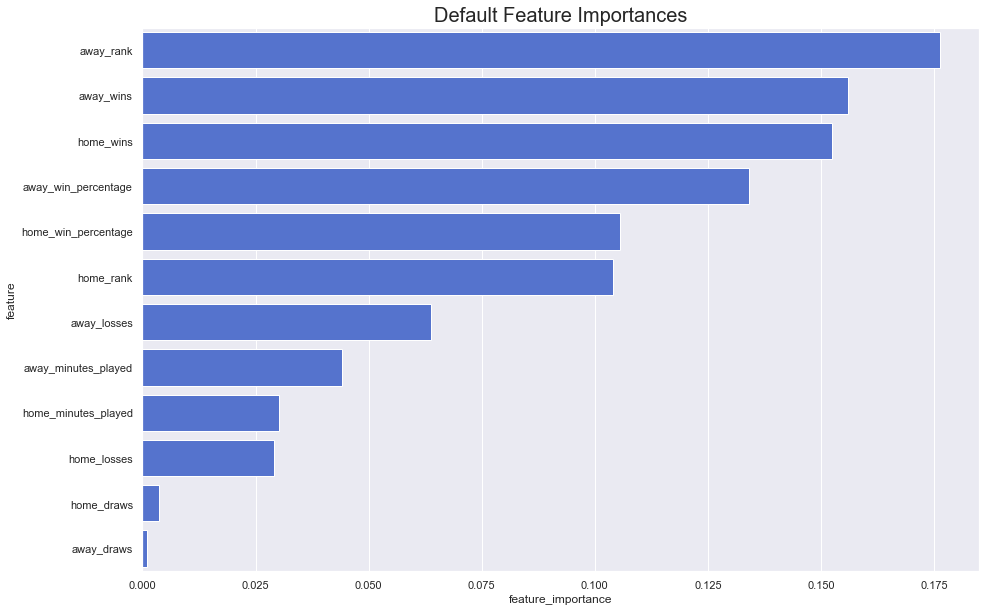

In [33]:
var_imp_plot(base_imp, 'Default Feature Importances')